# DataJoint U24 - Workflow Session

This notebook will describe the steps to explore the lab and animal management tables created by the elements.
Prior to using this notebook, please refer to the README for the installation instructions.

In [2]:
# change to the upper level folder to detect dj_local_conf.json
import os
if os.path.basename(os.getcwd())=='notebooks': os.chdir('..')
import datajoint as dj
dj.conn()

Connecting root@localhost:3306


DataJoint connection (connected) root@localhost:3306

Importing the module `workflow_session.pipeline` is sufficient to create tables inside the elements. This workflow comes prepackaged with example data and ingestion functions to populate lab, subject, and session tables.

In [3]:
from element_lab import lab
from element_animal import subject
from element_session import session
from workflow_session.ingest import ingest_lab, ingest_subjects, ingest_sessions

In [4]:
ingest_lab(); ingest_subjects();ingest_sessions()


---- Insert 2 entry(s) into lab tables ----

---- Insert 2 entry(s) into project table ----

---- Insert entry(s) into publication/keyword tables ----

---- Insert 2 entry(s) into protocol tables ----

---- Insert 2 entry(s) into subject tables ----

---- Insert 2 entry(s) into session.Session ----


## Workflow architecture

In [5]:
lab.Lab()

*lab     lab_name       institution    address        time_zone    
+------+ +------------+ +------------+ +------------+ +-----------+
LabA     The Example La Example Uni    221B Baker St, UTC+0        
LabB     The Other Lab  Other Uni      Oxford OX1 2JD UTC+0        
 (Total: 2)

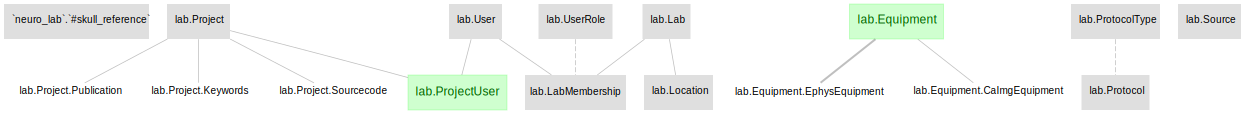

In [6]:
dj.Diagram(lab)

In [7]:
subject.Subject()

*subject     sex     subject_birth_ subject_descri
+----------+ +-----+ +------------+ +------------+
subject1     M       2020-12-30     test animal   
subject2     F       2020-11-30     test animal   
subject3     F       2020-12-30     test animal   
subject4     M       2021-02-12     test animal   
subject5     F       2020-01-03     lmash_E105    
subject6     M       2020-01-03     hneih_E105    
subject7     U       2020-08-30     test animal   
subject8     F       2020-09-30     test animal   
 (Total: 8)

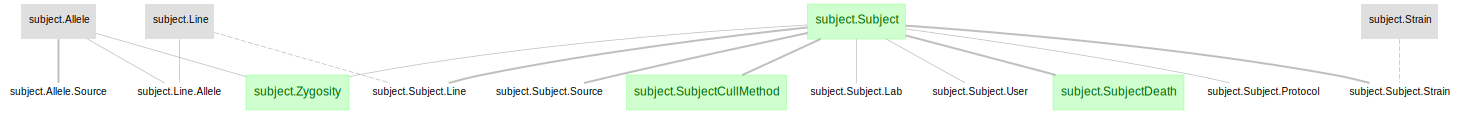

In [8]:
dj.Diagram(subject)

In [9]:
session.Session()

*subject     *session_datet
+----------+ +------------+
subject3     2021-04-30 12:
subject5     2020-04-15 11:
subject6     2021-01-15 11:
subject6     2021-06-02 14:
 (Total: 4)

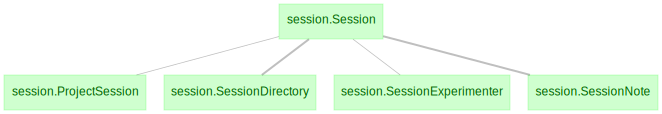

In [10]:
dj.Diagram(session)

(Workflow needs continued development to import geotyping tables)

In [11]:
# dj.Diagram(genotyping) + dj.Diagram(subject.Subject) + dj.Diagram(subject.Allele)

## Explore each table

In [12]:
# check table definition with describe()
subject.Subject.describe()

# Animal Subject
subject              : varchar(32)                  
---
sex                  : enum('M','F','U')            
subject_birth_date   : date                         
subject_description="" : varchar(1024)                



'# Animal Subject\nsubject              : varchar(32)                  \n---\nsex                  : enum(\'M\',\'F\',\'U\')            \nsubject_birth_date   : date                         \nsubject_description="" : varchar(1024)                \n'

In [13]:
# check table definition with dependencies with describe()
subject.Zygosity.describe()

-> subject.Subject
-> subject.Allele
---
zygosity             : enum('Present','Absent','Homozygous','Heterozygous') # zygosity



"-> subject.Subject\n-> subject.Allele\n---\nzygosity             : enum('Present','Absent','Homozygous','Heterozygous') # zygosity\n"

In [14]:
# check the name of every attribute with heading, 
# which will spell out the foreign key definition inherited from another table
subject.Zygosity.heading

# 
subject              : varchar(32)                  # 
allele               : varchar(32)                  # abbreviated allele name
---
zygosity             : enum('Present','Absent','Homozygous','Heterozygous') # zygosity

## Insert data into Manual and Lookup tables

Tables in this workflow are either manual tables or lookup tables. To insert into these tables, DataJoint provide method `.insert1()` and `insert()`.

In [15]:
subject.Subject.insert1(
    dict(subject='subject1', sex='M', subject_birth_date='2020-12-30', 
         subject_description='test animal'), skip_duplicates=True)
subject.Subject.insert1(
    ('subject2', 'F', '2020-11-30', 'test animal'), skip_duplicates=True)

`skip_duplicates=True` will prevent an error if you already have data for the primary keys in a given entry.

In [16]:
subject.Subject()

*subject     sex     subject_birth_ subject_descri
+----------+ +-----+ +------------+ +------------+
subject1     M       2020-12-30     test animal   
subject2     F       2020-11-30     test animal   
subject3     F       2020-12-30     test animal   
subject4     M       2021-02-12     test animal   
subject5     F       2020-01-03     lmash_E105    
subject6     M       2020-01-03     hneih_E105    
subject7     U       2020-08-30     test animal   
subject8     F       2020-09-30     test animal   
 (Total: 8)

In [17]:
# `insert()` takes a list of dicts or tuples
subject.Subject.insert(
    [dict(subject='subject3', sex='F', subject_birth_date='2020-12-30', 
            subject_description='test animal'),
     dict(subject='subject4', sex='M', subject_birth_date='2021-02-12', 
          subject_description='test animal')
    ],
    skip_duplicates=True)
subject.Subject.insert(
    [
        ('subject7', 'U', '2020-08-30', 'test animal'),
        ('subject8', 'F', '2020-09-30', 'test animal')
    ],
    skip_duplicates=True)

In [18]:
subject.Subject()

*subject     sex     subject_birth_ subject_descri
+----------+ +-----+ +------------+ +------------+
subject1     M       2020-12-30     test animal   
subject2     F       2020-11-30     test animal   
subject3     F       2020-12-30     test animal   
subject4     M       2021-02-12     test animal   
subject5     F       2020-01-03     lmash_E105    
subject6     M       2020-01-03     hneih_E105    
subject7     U       2020-08-30     test animal   
subject8     F       2020-09-30     test animal   
 (Total: 8)

For more documentation of insert, please refer to [DataJoint Docs](https://docs.datajoint.io/python/manipulation/1-Insert.html) and [DataJoint playground](https://playground.datajoint.io/)

## Insert into Manual and Lookup tables with Graphical User Interface

DataJoint also provides a Graphical User Interface [DataJoint Labbook](https://github.com/datajoint/datajoint-labbook) to support manual data insertions into DataJoint workflows. ![DataJoint Labbook preview](../images/DataJoint_Labbook.png)